In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import os,  sys

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')
from clean import BlockModelCleaner

In [3]:
block_model = BlockModelCleaner.get_processed_data()

In [4]:
block_model

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
block_id,,,,,,,,,,,,,,,,,,,,,
0,735929.7992,9549147.685,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
1,735941.6194,9549138.450,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
2,735953.4395,9549129.215,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
3,735965.2597,9549119.980,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
4,735977.0799,9549110.745,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973271,738703.5131,9548750.903,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973272,738715.3333,9548741.668,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973273,738727.1534,9548732.433,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076


In [7]:
# unique values for each dimension

columns = list(block_model.columns)
for col in columns:
    print(f"{col}: {len(block_model[col].unique())}")

centroid_x: 15698
centroid_y: 15698
centroid_z: 62
dim_x: 1
dim_y: 1
dim_z: 1
volume: 1
strat: 11
alteration: 14
ug_fault: 291
rock: 2
form3: 23
form4: 23
form5: 24
form6: 19
form7: 11
structure: 10
AG: 356387
AU: 242679
CU: 253527
pload_all: 843709
rqd: 444796
sg: 322339


In [5]:
block_model.describe()

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
count,973276.000000,9.732760e+05,973276.00000,973276.0,973276.0,973276.0,973276.0,973276.000000,973276.000000,973276.000000,...,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000,973276.000000
mean,737340.296480,9.548931e+06,2655.00000,15.0,15.0,15.0,3375.0,5.292959,0.835149,2.681185,...,3.756115,3.110023,2.314340,0.132779,0.651424,0.098669,0.109501,4.222211,38.564365,2.666850
std,622.487804,5.486947e+02,268.43309,0.0,0.0,0.0,0.0,2.318081,1.816848,22.848540,...,4.404294,3.310017,2.052117,0.672193,1.502818,0.271094,0.311342,4.692962,47.481035,0.127067
min,735929.799200,9.547615e+06,2197.50000,15.0,15.0,15.0,3375.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.000100,-9.000000,-9.000000,2.017486
25%,736846.974500,9.548530e+06,2422.50000,15.0,15.0,15.0,3375.0,4.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.001000,0.001000,0.000100,3.237774,-9.000000,2.598106
50%,737340.296500,9.548931e+06,2655.00000,15.0,15.0,15.0,3375.0,5.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.001000,0.001000,0.000100,5.557900,27.065482,2.649738
75%,737833.618500,9.549332e+06,2887.50000,15.0,15.0,15.0,3375.0,8.000000,2.000000,0.000000,...,4.000000,3.000000,2.000000,0.000000,0.757571,0.047920,0.066785,6.811731,95.894508,2.691703
max,738750.793700,9.550247e+06,3112.50000,15.0,15.0,15.0,3375.0,10.000000,13.000000,293.000000,...,23.000000,18.000000,10.000000,9.000000,30.616684,8.018827,6.000222,14.805711,99.441643,4.385423


In [4]:
block_model.columns

Index(['centroid_x', 'centroid_y', 'centroid_z', 'dim_x', 'dim_y', 'dim_z',
       'volume', 'strat', 'alteration', 'ug_fault', 'rock', 'form3', 'form4',
       'form5', 'form6', 'form7', 'structure', 'AG', 'AU', 'CU', 'pload_all',
       'rqd', 'sg'],
      dtype='object')

In [5]:
block_model['CU'].describe()

count    973276.000000
mean          0.109501
std           0.311342
min           0.000100
25%           0.000100
50%           0.000100
75%           0.066785
max           6.000222
Name: CU, dtype: float64

In [9]:
filtered_block_model = block_model.query('CU > 0.001')

In [10]:
filtered_block_model.describe()

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
count,372932.000000,3.729320e+05,372932.000000,372932.0,372932.0,372932.0,372932.0,372932.000000,372932.000000,372932.000000,...,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000,372932.000000
mean,737211.885373,9.549056e+06,2742.406256,15.0,15.0,15.0,3375.0,5.883418,1.344331,6.264936,...,3.558684,2.770307,1.794496,0.321659,1.687020,0.255780,0.285602,5.217917,79.007356,2.705751
std,462.185982,4.542671e+02,210.893938,0.0,0.0,0.0,0.0,2.154858,2.292478,34.502119,...,4.766038,2.939307,1.409552,1.030155,2.033651,0.389591,0.450224,2.021059,29.337285,0.165788
min,736003.678600,9.547697e+06,2197.500000,15.0,15.0,15.0,3375.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.001000,0.001000,0.001001,-9.000000,-9.000000,2.024885
25%,736862.512900,9.548748e+06,2572.500000,15.0,15.0,15.0,3375.0,4.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.592918,0.029333,0.035831,3.960624,65.510452,2.640130
50%,737238.172800,9.549111e+06,2722.500000,15.0,15.0,15.0,3375.0,5.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.086988,0.109864,0.133910,5.452675,95.999188,2.675277
75%,737583.915900,9.549401e+06,2917.500000,15.0,15.0,15.0,3375.0,8.000000,2.000000,0.000000,...,3.000000,3.000000,2.000000,0.000000,1.988680,0.355358,0.354174,6.487227,98.673176,2.742386
max,738329.692100,9.550188e+06,3112.500000,15.0,15.0,15.0,3375.0,10.000000,13.000000,293.000000,...,23.000000,18.000000,10.000000,9.000000,30.616684,8.018827,6.000222,14.154212,99.441643,4.385423


In [7]:
# %matplotlib widget

# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.scatter3D(
#     block_model['centroid_x'],
#     block_model['centroid_y'],
#     block_model['centroid_z'],
#     c='lightgrey',
#     alpha=0.005
# )

# ax.scatter3D(
#     filtered_block_model['centroid_x'],
#     filtered_block_model['centroid_y'],
#     filtered_block_model['centroid_z'],
#     c='pink',
#     alpha=0.2
# )

# ax.azim = 0
# ax.elev = 40

# fig.tight_layout()

In [17]:
pts = block_model.iloc[:, 0:3].to_numpy()

In [40]:
# %matplotlib widget
from scipy.spatial import ConvexHull

# 8 points defining the cube corners

hull = ConvexHull(pts)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    print(s)
    print(pts[s, 0], pts[s, 1], pts[s, 2])

[958246    668      0 958246]
[735966.7389 735966.7389 735929.7992 735966.7389] [9549194.966 9549194.966 9549147.685 9549194.966] [3112.5 2197.5 2197.5 3112.5]
[958246 957578      0 958246]
[735966.7389 735929.7992 735929.7992 735966.7389] [9549194.966 9549147.685 9549147.685 9549194.966] [3112.5 3112.5 2197.5 3112.5]
[958246   1670    668 958246]
[735966.7389 736022.1484 735966.7389 735966.7389] [9549194.966 9549265.887 9549194.966 9549194.966] [3112.5 2197.5 2197.5 3112.5]
[958246   1670 959248 958246]
[735966.7389 736022.1484 736022.1484 735966.7389] [9549194.966 9549265.887 9549265.887 9549194.966] [3112.5 2197.5 3112.5 3112.5]
[962254  15030   4676 962254]
[736188.377  736760.9422 736188.377  736188.377 ] [9549478.65 9550211.5  9549478.65 9549478.65] [3112.5 2197.5 2197.5 3112.5]
[962254  15030 972608 962254]
[736188.377  736760.9422 736760.9422 736188.377 ] [9549478.65 9550211.5  9550211.5  9549478.65] [3112.5 2197.5 3112.5 3112.5]
[962254   1670   4676 962254]
[736188.377  73602

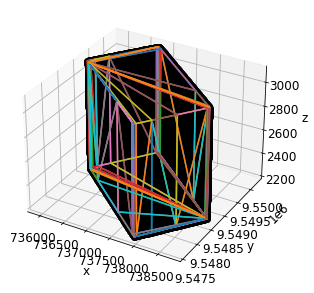

In [36]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update(
    {
        'font.size': 12
    }
)

fig = plt.figure()
fig.set_size_inches(7, 5)
ax = plt.axes(projection='3d')

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis labels
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

# ax.azim = 0
# ax.elev = 40


plt.show()